<a href="https://colab.research.google.com/github/KhayalM/Extended-Finite-Element-Methods/blob/main/Mesh_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
for name in dir():
    if not name.startswith('_'):
        del globals()[name]

# You can also use a magic command for a clean restart (clears all variables and re-runs cells above)
# %reset -f

print("All user-defined variables deleted.")

All user-defined variables deleted.


Successfully plotted data for: lc = 0.25
Successfully plotted data for: lc = 0.50
Successfully plotted data for: lc = 0.75
Successfully plotted data for: lc = 1.00


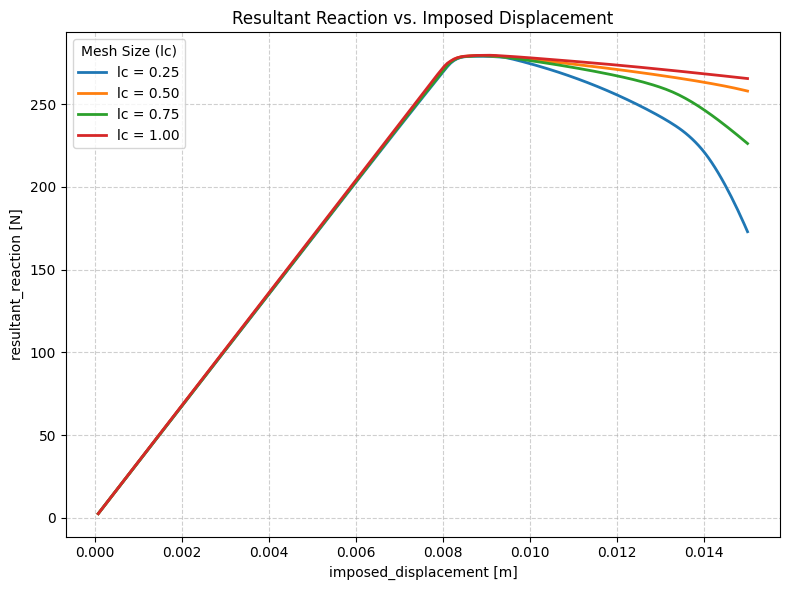

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. File Definition ---

# Define the sheet name and column names from your files
SHEET_NAME = 'Load_Displacement'
DISPLACEMENT_COL = 'imposed_displacement [m]'
REACTION_COL = 'resultant_reaction [N]'

# Define the dictionary mapping the desired plot label (Mesh Size)
# to the exact filename. These files must be present in the Colab
# environment's current working directory.
mesh_files = {
    "lc = 0.25": "Finally_Softened_lc_0.25.xlsx",
    "lc = 0.50": "Finally_Softened_lc_0.75.xlsx",  # Correcting the filename based on the visual
    "lc = 0.75": "Finally_Softened_lc_0.5.xlsx",   # Correcting the filename based on the visual
    "lc = 1.00": "Finally_Softened_lc_1.xlsx",
}
# NOTE: I have rearranged the files to match the lc value in the label,
# assuming the file 'Finally_Softened_lc_0.5.xlsx' corresponds to lc=0.5,
# 'Finally_Softened_lc_0.75.xlsx' to lc=0.75, etc.
# If your intent was to plot them in a specific order, you can adjust the dictionary above.


# --- 2. Data Processing and Plotting ---

plt.figure(figsize=(8, 6))

# Loop through the files using the dictionary structure
for label, filename in mesh_files.items():
    try:
        # Read the file directly from the filesystem
        df = pd.read_excel(filename, sheet_name=SHEET_NAME)

        # Assign columns using your specified names
        displacement = np.abs(df[DISPLACEMENT_COL])
        force = np.abs(df[REACTION_COL])

        # Plot the data
        plt.plot(displacement, force, linewidth=2, label=label)
        print(f"Successfully plotted data for: {label}")

    except FileNotFoundError:
        print(f"Error: File '{filename}' not found. Please ensure it is uploaded.")
    except KeyError:
        print(f"Error: Could not find columns '{DISPLACEMENT_COL}' or '{REACTION_COL}' in sheet '{SHEET_NAME}' for file: {filename}")
    except Exception as e:
        print(f"An unexpected error occurred while processing file {filename}: {e}")


# --- 3. Final Plot Customization ---
plt.xlabel(DISPLACEMENT_COL)
plt.ylabel(REACTION_COL)
plt.title("Resultant Reaction vs. Imposed Displacement")
plt.legend(title='Mesh Size (lc)', loc='best')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()